# 1. Cleaning up the dataset

In [2]:
#!pip install statistics
from statistics import mean
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [3]:
df = pd.read_csv('/home/student/Desktop/Assignment/Scraped Data/Vienna Airport share price/share_price_Vienna_src_dirty.csv')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 29, 2021",27.25,28.45,27.25,28.45,28.45,-
1,"Oct 28, 2021",27.6,27.6,27.25,27.25,27.25,-
2,"Oct 28, 2021",27.6,27.6,27.25,27.25,27.25,-
3,"Oct 27, 2021",28.25,28.25,27.45,27.6,27.6,-
4,"Oct 26, 2021",28.35,28.4,28.1,28.1,28.1,-


In [4]:
df.shape

(726, 7)

# Issue 1: Dealing with NaNs
### **Imputing using row's mean value**

In [11]:
df.count() ##seems that there some NaNs

Date           726
Open           726
High           723
Low            724
Close*         726
Adj Close**    726
Volume         726
dtype: int64

In [12]:
##identifying the NaNs
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close*,Adj Close**,Volume
157,"Mar 24, 2021",29.5,NaN,28.7,28.95,28.95,-
200,"Jan 22, 2021",28.95,NaN,28.55,29.1,29.1,-
218,"Dec 23, 2020",27,28.1,NaN,28.1,28.1,-
267,"Oct 16, 2020",21.85,21.85,NaN,21.25,21.25,-
293,"Sep 10, 2020",25.35,NaN,25.35,25.45,25.45,-


In [5]:
##fetching indices for row with NaNs
print(df[df.isnull().any(1)].index)

Int64Index([157, 200, 218, 267, 293], dtype='int64')


In [8]:
null_indices = [157, 200, 218, 267, 293]

In [6]:
def list_mean(list):
    '''function to capture the values with a list, convert them all to floats and then calculate their mean
    we do this because to make sure all values in a certain row are coerced into floats and gathered
    into a list to be used to calculate the mean which we then use to impute the missing value within a row'''
    ints=[]
    for i in list:
        if i == i:
            ints.append(float(i))
        else:
            pass
    return mean(ints)

In [9]:
##applying the function to all rows containing nulls to impute the missing values
##using the mean of the respective row
for i in null_indices:
    y = list_mean(list(df.iloc[i,1:5]))
    df.iloc[i, 1:5].fillna(y, inplace= True)
    print(df.iloc[i,])

Date           Mar 24, 2021
Open                   29.5
High                  29.05
Low                    28.7
Close*                28.95
Adj Close**           28.95
Volume                    -
Name: 157, dtype: object
Date           Jan 22, 2021
Open                  28.95
High              28.866667
Low                   28.55
Close*                 29.1
Adj Close**            29.1
Volume                    -
Name: 200, dtype: object
Date           Dec 23, 2020
Open                     27
High                   28.1
Low               27.733333
Close*                 28.1
Adj Close**            28.1
Volume                    -
Name: 218, dtype: object
Date           Oct 16, 2020
Open                  21.85
High                  21.85
Low                   21.65
Close*                21.25
Adj Close**           21.25
Volume                    -
Name: 267, dtype: object
Date           Sep 10, 2020
Open                  25.35
High              25.383333
Low                   25.35
Clos

In [10]:
##let's check with row 157
df.iloc[157,1:5]

Open       29.5
High      29.05
Low        28.7
Close*    28.95
Name: 157, dtype: object

In [11]:
df.count() ## no more NaNs

Date           726
Open           726
High           726
Low            726
Close*         726
Adj Close**    726
Volume         726
dtype: int64

# Issue 2: Removing duplicates

In [12]:
##checking for duplicates
df[df.duplicated()]

,Date,Open,High,Low,Close*,Adj Close**,Volume
2,"Oct 28, 2021",27.6,27.6,27.25,27.25,27.25,-
60,"Aug 10, 2021",27.8,27.95,27.7,27.85,27.85,-
137,"Apr 23, 2021",30.05,30.2,29.7,30,30,-
566,"Aug 15, 2019",40,40.2,39.55,40.2,36.87,-


In [13]:
##dropping duplicates
df.drop_duplicates(inplace=True)

In [14]:
##check again... voila
df[df.duplicated()]
df.shape

(722, 7)

# Issues 3 & 4: Adjusting data types and removing rows with non-relevant information

### Converting the 'Date' column to date format 

In [15]:
df.dtypes ##all are objects

Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

##Error: Unknown string format: *Close price adjusted for splits.**Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

In [17]:
##looking for the incompatible/unknown string format
row = df.apply(lambda row: row.astype(str).str.contains('Close').any(), axis=1) 
df[row]

,Date,Open,High,Low,Close*,Adj Close**,Volume
725,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [18]:
##dropping problematic row
df.drop(axis=0, index=725, inplace= True)
df.shape

(721, 7)

In [19]:
##check again
row = df.apply(lambda row: row.astype(str).str.contains('Close').any(), axis=1) 
df[row]

,Date,Open,High,Low,Close*,Adj Close**,Volume


In [20]:
##try adjusting data column type again
df['Date'] = pd.to_datetime(df['Date'])

### Converting the rest of the columns to float type

In [ ]:
df[["Open", "High", "Low", "Close*", "Adj Close**", "Volume"]] = df[["Open", "High", "Low", "Close*", "Adj Close**", "Volume"]].apply(pd.to_numeric)

##ValueError: Unable to parse string "1.13 Dividend" at position 293

In [22]:
##looking for problematic rows
rows = df.apply(lambda row: row.astype(str).str.contains('Dividend').any(), axis=1) 
df[rows]

##three rows with indeces 296, 367 and 638

,Date,Open,High,Low,Close*,Adj Close**,Volume
296,2020-09-08,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend
367,2020-06-02,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend,1.13 Dividend
638,2019-05-07,0.89 Dividend,0.89 Dividend,0.89 Dividend,0.89 Dividend,0.89 Dividend,0.89 Dividend


In [23]:
##dropping problematic rows
df.drop(axis=0, index=[296,367,638], inplace= True)
df.shape

(718, 7)

In [ ]:
##try adjusting types again
##adjusting the rest of the columns to numeeric
df[["Open", "High", "Low", "Close*", "Adj Close**", "Volume"]] = df[["Open", "High", "Low", "Close*", "Adj Close**", "Volume"]].apply(pd.to_numeric)

##ValueError: Unable to parse string "-" at position 0

In [25]:
df['Volume'].value_counts()

##692 of the enteries in the Volume column are "-", so we drop this column

-      692
100      3
30       2
191      2
160      1
15       1
25       1
142      1
38       1
190      1
60       1
256      1
50       1
1        1
5        1
400      1
20       1
40       1
8        1
352      1
300      1
200      1
11       1
Name: Volume, dtype: int64

In [26]:
##dropping "Volume" Column
df.drop(columns = 'Volume', inplace = True)

In [27]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**
0,2021-10-29,27.25,28.45,27.25,28.45,28.45
1,2021-10-28,27.6,27.6,27.25,27.25,27.25
3,2021-10-27,28.25,28.25,27.45,27.6,27.6
4,2021-10-26,28.35,28.4,28.1,28.1,28.1
5,2021-10-25,28.6,28.6,28.25,28.25,28.25


In [28]:
##try adjusting type again
df[["Open", "High", "Low", "Close*", "Adj Close**"]] = df[["Open", "High", "Low", "Close*", "Adj Close**"]].apply(pd.to_numeric)

##check types
df.dtypes ##now everthing has the correct data type

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object

In [29]:
##resetting the index 
df.reset_index(inplace=True) 

# Issue 5: Handling Outliers

<AxesSubplot:>

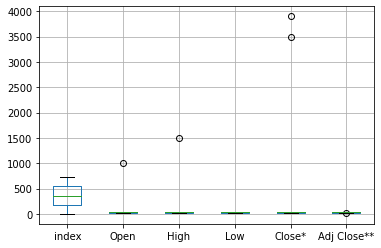

In [30]:
##checking if there are outliers
df.boxplot() ##outliers in columns Open, High and Close* columns

In [31]:
##identifying the rows with outlier values
#df.index[df['Open'] >500] #374
#df.index[df['High'] >500] #427
df.index[df['Close*'] >500] #576, 586

Int64Index([576, 586], dtype='int64')

In [36]:
##replacing outliers with nans
df[df.iloc[:, 2:6] >500] = np.nan
df.count()

index          718
Date           718
Open           717
High           717
Low            718
Close*         716
Adj Close**    718
dtype: int64

In [ ]:
##filling up the NaNs with mean values
##a copy of the dataframe has to be created; pandas fillna inplace does not work with np.nan
df2 = df.fillna(df.mean())

In [38]:
##refelct changes in original dataset
df=df2

In [39]:
##check if it worked
df.iloc[576, :]

index                          582
Date           2019-07-24 00:00:00
Open                         39.85
High                         39.85
Low                           39.5
Close*                   31.469972
Adj Close**                  36.23
Name: 576, dtype: object

# Lastly adjust column names

In [40]:
df.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj _Close'}, inplace=True)

In [41]:
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj _Close'], dtype='object')

In [42]:
##drop index column
df.drop(columns = 'index', inplace = True)

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj _Close
0,2021-10-29,27.25,28.45,27.25,28.45,28.45
1,2021-10-28,27.60,27.60,27.25,27.25,27.25
2,2021-10-27,28.25,28.25,27.45,27.60,27.60
3,2021-10-26,28.35,28.40,28.10,28.10,28.10
4,2021-10-25,28.60,28.60,28.25,28.25,28.25


# 2. Enriching the dataset

In [44]:
##adding a column with the average daily values
df['average'] = df.mean(numeric_only=True, axis=1)

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj _Close,average
0,2021-10-29,27.25,28.45,27.25,28.45,28.45,27.97
1,2021-10-28,27.60,27.60,27.25,27.25,27.25,27.39
2,2021-10-27,28.25,28.25,27.45,27.60,27.60,27.83
3,2021-10-26,28.35,28.40,28.10,28.10,28.10,28.21
4,2021-10-25,28.60,28.60,28.25,28.25,28.25,28.39


In [43]:
df.to_csv('Share_Price_Vienna_stage.csv')